<a href="https://colab.research.google.com/github/awr7/Logistic-Regresion-and-Perceptron/blob/main/Logistic_Regresion_and_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regresion and Perceptron

*   By: Angel Rosario

# About this Project

In this project, I have implemented and analyzed two pivotal machine learning algorithms: Logistic Regression and the Perceptron. The project involves building these algorithms from the ground up, focusing on their application to real-world data scenarios. The Logistic Regression model is crafted using a Maximum Likelihood Estimation (MLE) technique, while the Perceptron model is developed through its foundational learning update mechanism. Key aspects of the project include generating diverse datasets to challenge the models, and a thorough evaluation of their performance. Additionally, I have benchmarked these models against established frameworks from the Sci-kit Learn library to ensure robustness and accuracy.

---
# 1. Setup and Data Processing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
%matplotlib inline


def data(n_samples = 100, seed = 123, separable = True):

    np.random.seed(seed)

    if separable == True: # separable
        # genrate points using Gaussian distributions
        p1 = np.random.multivariate_normal([0, 0], [[1, .95],[.95, 1]], n_samples)
        p2 = np.random.multivariate_normal([1, 4], [[1, .65],[.65, 1]], n_samples)
        X = np.vstack((p1, p2)).astype(np.float32)
        Y = np.hstack((np.ones(n_samples), np.zeros(n_samples)))

    else: # nonseparable
        p1 = np.random.multivariate_normal([0, 0], [[1, .55],[.55, 1]], n_samples)
        p2 = np.random.multivariate_normal([1, 2.5], [[1, .55],[.55, 1]], n_samples)
        X = np.vstack((p1, p2)).astype(np.float32)
        Y = np.hstack((np.ones(n_samples), np.zeros(n_samples)))
    return X,Y

---
# 2. Implementation of Learning Algorithms

## Important Functions

In [ ]:
# @title Helper Functions

# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# sgn function (step function)
def sgn(z):
    return (z>0.5).astype(float)        # returns {0,1}
    # return 2*(z>0.5).astype(float)-1  # returns {-1,+1}

# X: features, Y: targes, W: weights, Z: scores (net-value)
def log_likelihood(X, Y, W):
    Z = np.dot(X,W)
    LL = np.sum( Y*Z - np.log(1 + np.exp(Z)) )
    return np.sum(LL)

# predict using given model (W) and data point(s) X
def predict(W, X):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    Y = sigmoid(np.dot(X,W))
    return (Y>0.5).astype(float), Y

# compute the prediciton accuracy
# Y_pred are predicted tarets, and Y_true are groundtruth targets
# note, targets are expected to be from the set {0,1}
def pred_accuracy(Y_pred, Y_true):
    return 1-np.sum(np.square(Y_true-Y_pred))/(Y_true.shape[0])

In [ ]:
# @title Ploting Functions

def plot_model_1(W, X, Yc, smooth = True):
    xmin = X[:,0].min()-0.5
    xmax = X[:,0].max()+0.5
    ymin = X[:,1].min()-0.5
    ymax = X[:,1].max()+0.5
    xx, yy = np.mgrid[xmin:xmax:0.01, ymin:ymax:0.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = predict(W, grid)
    probs = np.array(probs[smooth]).reshape(xx.shape)
    contour = plt.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
    plt.scatter(X[:, 0], X[:, 1], c=Yc, alpha=.5, s=50,
            cmap="RdBu", vmin=-.2, vmax=1.2,
            edgecolor="white", linewidth=1)
    plt.axis([xmin, xmax, ymin, ymax])
    # plt.axis('equal')
    ax = plt.gca()

def plot_model_2(W, X, Yc):
    xmin = X[:,0].min()-0.5
    xmax = X[:,0].max()+0.5
    ymin = X[:,1].min()-0.5
    ymax = X[:,1].max()+0.5
    x1 = np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5)
    x2 = -W[1]*x1/W[2]-W[0]/W[2]
    plt.scatter(X[:, 0], X[:, 1], c = Yc, alpha = .5, cmap="RdBu")
    plt.plot(x1, x2, color='red')
    plt.axis([xmin, xmax, ymin, ymax])
    # plt.axis('equal')
    ax = plt.gca()

The way that I completed the Logistic Regression training function was by first getting the dot product between the feautres and the model weights which I then passed through the sigmoid function to get the predicted probabilities. After that I calculated gradient descent which are the values of the model parameter that minimize the loss function and I updated W using the gradient descent rule.

In [ ]:
# Logistic Regression Implementation (MLE)

# input: X are features, Y are targets
# output: W are parameters of the model (weights and bias)
def train_logistic_regression(X, Y, max_iter, learning_rate, print_iter = False):

    # augment the data points with the additional constant 1 to allow for dot-products
    b = np.ones((X.shape[0], 1))
    X = np.hstack((b, X))

    # init the model paramerers with zeros
    W = np.zeros(X.shape[1])
    threshold = 1e-6

    # iterate over the set and perform training
    for iteration in range(max_iter):

        Z = np.dot(X, W)
        Y_pred = sigmoid(Z)
        grad_descent = np.dot(X.T, (Y - Y_pred))

        # update W
        W = W + learning_rate * grad_descent

        if print_iter:
            print("Iteration: ", iteration, "W: ", W)

    # output the model parameter vector W
    print("training complete, W =", W, ", iterations:", iteration)
    return W


The way I implemented the basic perceptron learning update rule was by first converting the labels from {0,1} to {-1,1} then I computed the dot product of the parameters of the model and the feautres in order to later make predictions of the class labels for each example in the training set based on their corresponding scores. I then computed the change in the weights of the perceptron algorithmn based on the difference between the predicted and actual outputs and updated our W.

In [ ]:
# Perceptron Implementation

# input: X are features, Y are targets
# output: W are parameters of the model (weights and bias)
def train_perceptron(X, Y, max_iter, learning_rate, print_iter = False):
    # augment the data points with the additional constant 1 to allow for dot-products
    b = np.ones((X.shape[0], 1))
    X = np.hstack((b, X))

    # init the model paramerers with zeros
    W = np.zeros(X.shape[1])
    threshold = 1e-10

    # iterate over the set and perform training
    for iteration in range(max_iter):

        #Change the target labels to -1 and 1
        Y_new = np.where(Y == 0, -1, 1)
        #Predict class labels for each example
        Z = np.dot(X, W)
        Y_pred = np.sign(Z)

        # Update W
        delta_W = learning_rate * np.dot((Y_new - Y_pred), X)
        W += delta_W

        if print_iter:
            print("Iteration: ", iteration, "W: ", W)

    # output the optimized model parameters
    print("training complete, W =", W, ", iterations:", iteration)
    return W

The way I tried to implement the averaging extension was by first initailizing the average weight and then doing the same thing I did in the basic perceptron learning update rule. Then I updated my count variable +1 and computed the running average of the weights.

In [ ]:
# Perceptron Implementation with extensions

# input: X are features, Y are targets
# output: W are parameters of the model (weights and bias)
def train_perceptron(X, Y, max_iter, learning_rate, print_iter = False):

    # augment the data points with the additional constant 1 to allow for dot-products
    b = np.ones((X.shape[0], 1))
    X = np.hstack((b, X))

    # init the model paramerers with zeros
    W = np.zeros(X.shape[1])
    threshold = 1e-10

    # iterate over the set and perform training
    for iteration in range(max_iter):

        #initialize average weight and count
        W_avg = np.zeros(X.shape[1])
        count = 0
        # Change the target labels to -1 and 1
        Y_new = np.where(Y == 0, -1, 1)

        # Predict class labels for each example
        Z = np.dot(X, W)
        Y_pred = np.sign(Z)

        # Update W
        delta_W = learning_rate * np.dot((Y_new - Y_pred), X)
        W += delta_W

        # Update the averaged weights
        count += 1
        W_avg = ((count - 1) * W_avg + W) / count

        if print_iter:
            print("Iteration: ", iteration, "W: ", W)

    # output the optimized model parameters
    print("training complete, W =", W, ", iterations:", iteration)
    return W

---
# 3. Training and Testing of the Models

The way I performed the training to try to find the best set of hyperparameters was by trying out different max iterations and learning rates for both algorithms. What I found out is that the more iteration and lower the learning for the Logistic Regression trainning and the Perceptron training the more accurate the results were. However in perceptron no matter how many iterations or learning rate the results would not exceed 99.5% accuracy

<ipython-input-8-4759fcd45605>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


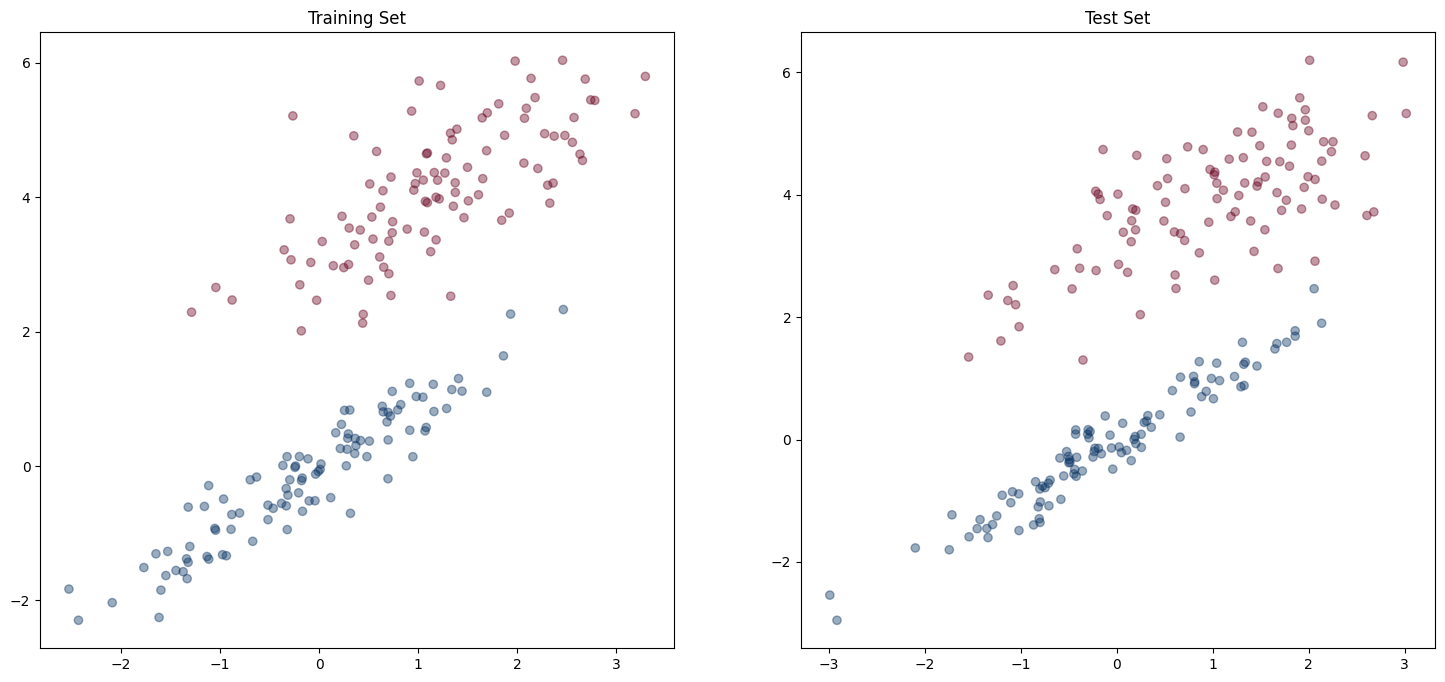

In [ ]:
# @title Create and Plot Datasets

X_train, Y_train = data(n_samples = 100, seed = 123, separable = True)
X_test,  Y_test  = data(n_samples = 100, seed = 321, separable = True)

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)

plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, alpha = .4, cmap="RdBu")
plt.title("Training Set")
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0],  X_test[:, 1],  c = Y_test,  alpha = .4, cmap="RdBu")
plt.title("Test Set")
plt.show()

In [ ]:
# train logistic regression
W_logr = train_logistic_regression(X_train, Y_train, max_iter = 100, learning_rate=0.01)
# train perceptron
W_perc = train_perceptron(X_train, Y_train, max_iter = 50, learning_rate=0.01)

training complete, W = [ 4.46841398  1.98657331 -3.27546716] , iterations: 99
training complete, W = [ 2.44        1.07254846 -1.91780071] , iterations: 49


<ipython-input-10-30ec5da6fb74>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


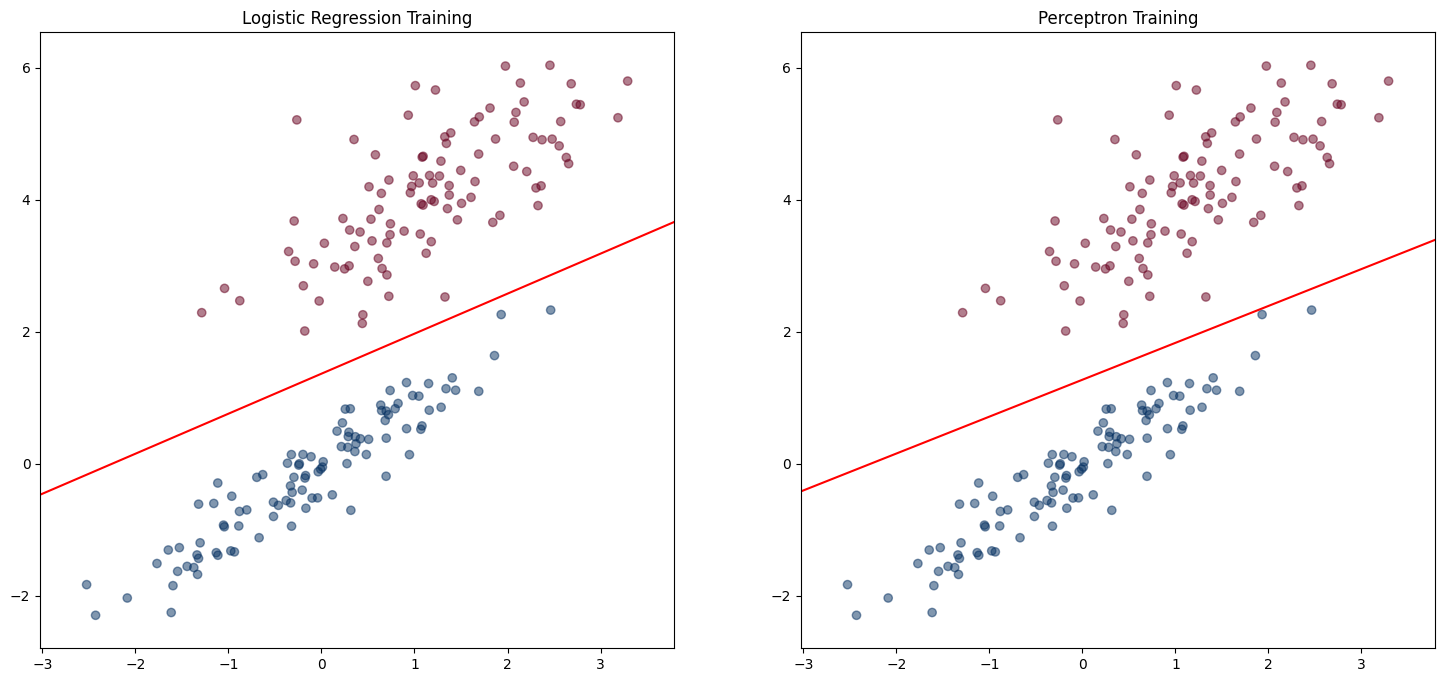

In [ ]:
# @title Plot the trained models using the training sets

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)
plot_model_2(W_logr, X_train, Y_train)
plt.title("Logistic Regression Training")
plt.subplot(1,2,2)
plot_model_2(W_perc, X_train, Y_train)
plt.title("Perceptron Training")
plt.show()

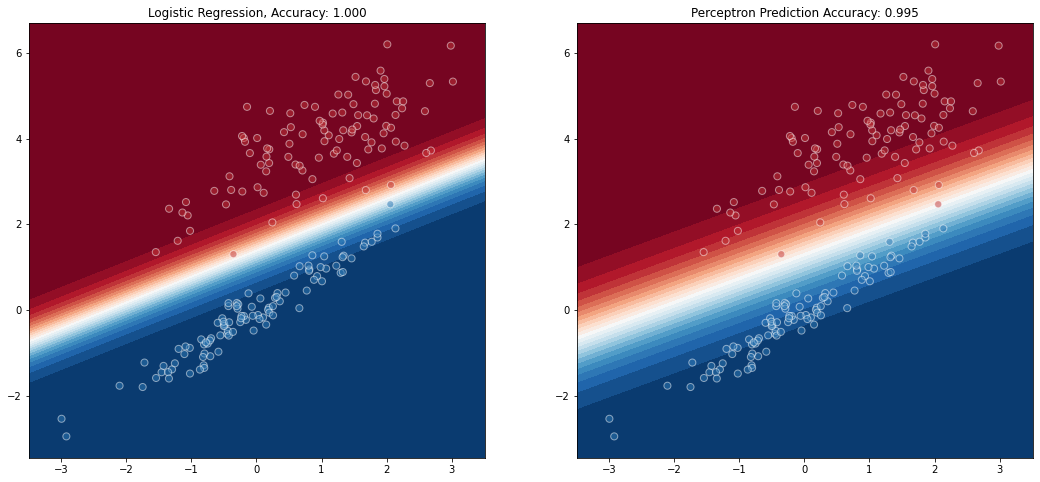

In [ ]:
# @title Prediction of Logistic Regression using Test Data

Y_pred, Y_smooth = predict(W_logr, X_test)

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)
plot_model_1(W_logr, X_test, Y_pred)
plt.title("Logistic Regression, Accuracy: %1.3f" %pred_accuracy(Y_test, Y_pred))

Y_pred, Y_smooth = predict(W_perc, X_test)

plt.subplot(1,2,2)
plot_model_1(W_perc, X_test, Y_pred)
plt.title("Perceptron Prediction Accuracy: %1.3f" %pred_accuracy(Y_test, Y_pred))
plt.show()

---
# 4. Train and Compare to SCI-KIT LEARN
https://scikit-learn.org/stable/

Sci-kit Learn is a Python framework for machine learning. This example below shows how to use the simple models we have implemented above.

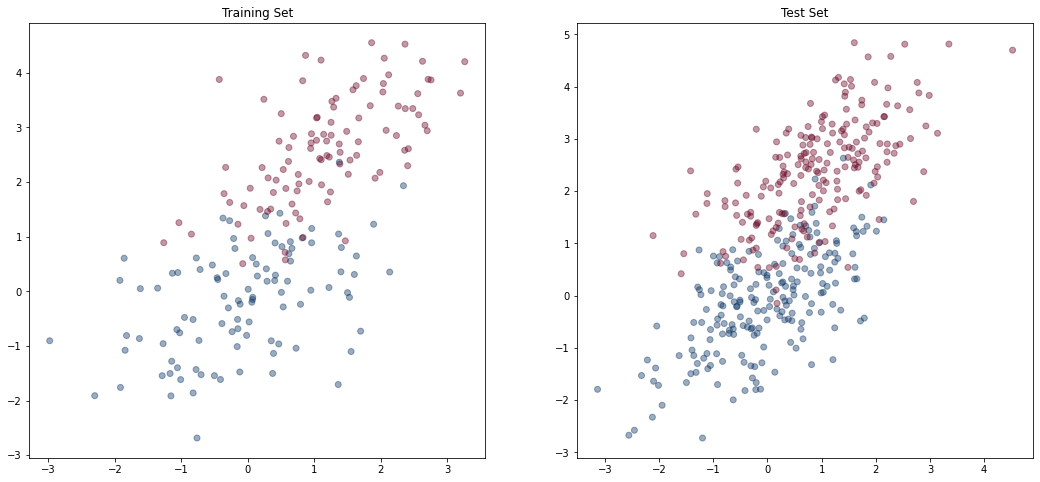

In [ ]:
# @title Create and Plot Overlapping Datasets

X_train, Y_train = data(n_samples = 100, seed = 123, separable = False)
X_test,  Y_test  = data(n_samples = 200, seed = 321, separable = False)

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, alpha = .4, cmap="RdBu")
plt.title("Training Set")
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0],  X_test[:, 1],  c = Y_test,  alpha = .4, cmap="RdBu")
plt.title("Test Set")
plt.show()

The way I found a set of hyperparameters such that both classifiers perfom as best as possible on the non-seperable dataset was by testing out different max iterations and learning rates and comparing which ones gave me better accuracy. What I found is that the higher the iteration the more accurate my results were.While the higher the learning rate the more accurate my results were.

In [ ]:
# train logistic regression
W_logr = train_logistic_regression(X_train, Y_train, max_iter=100, learning_rate=0.01)
# train perceptron
W_perc = train_perceptron(X_train, Y_train, max_iter=100, learning_rate=0.01)


training complete, W = [ 3.56658724  0.51104494 -3.2450552 ] , iterations: 99
training complete, W = [ 2.38        0.31644436 -1.98571746] , iterations: 99


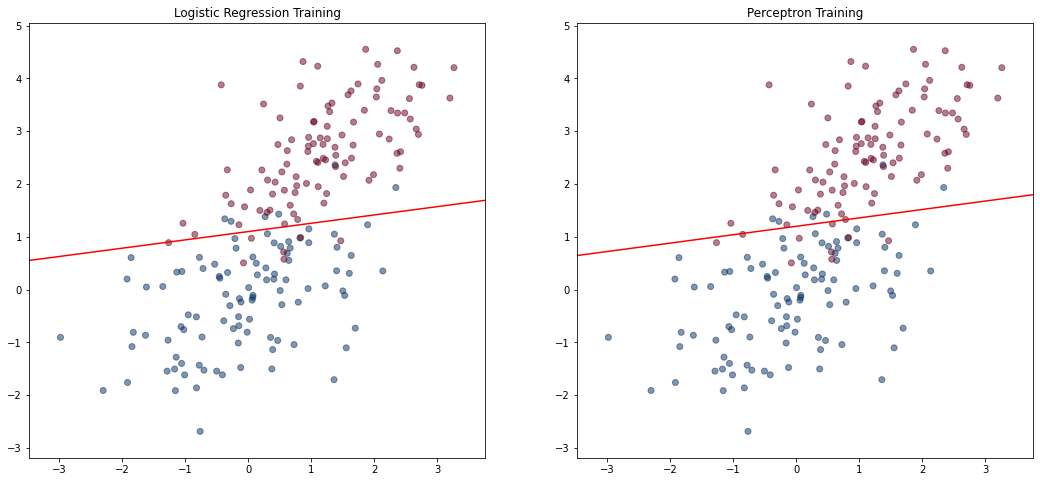

In [ ]:
# @title Plot the trained models using the training sets

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)
plot_model_2(W_logr, X_train, Y_train)
plt.title("Logistic Regression Training")
plt.subplot(1,2,2)
plot_model_2(W_perc, X_train, Y_train)
plt.title("Perceptron Training")
plt.show()

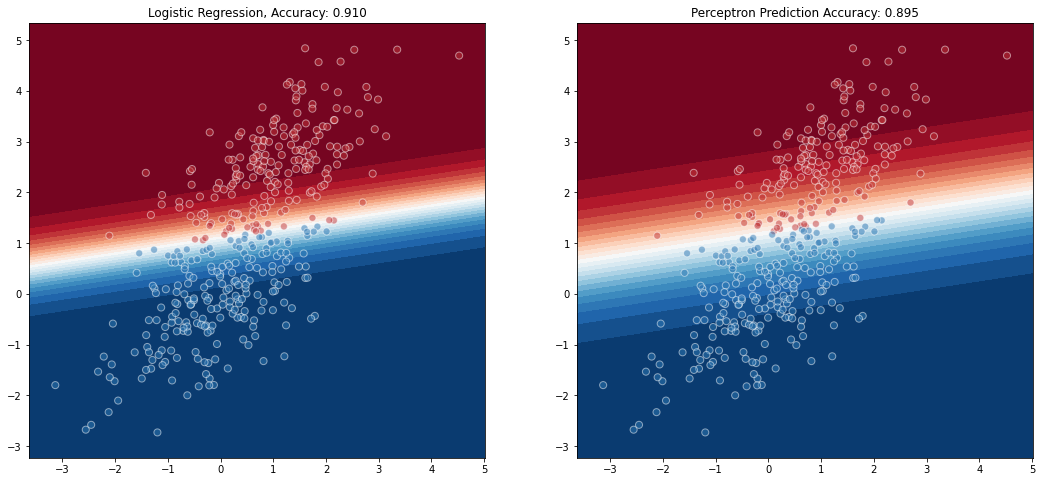

In [ ]:
# @title Prediction of Logistic Regression using Test Data

Y_pred, Y_smooth = predict(W_logr, X_test)

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)
plot_model_1(W_logr, X_test, Y_pred)
plt.title("Logistic Regression, Accuracy: %1.3f" %pred_accuracy(Y_test, Y_pred))

Y_pred, Y_smooth = predict(W_perc, X_test)

plt.subplot(1,2,2)
plot_model_1(W_perc, X_test, Y_pred)
plt.title("Perceptron Prediction Accuracy: %1.3f" %pred_accuracy(Y_test, Y_pred))
plt.show()

Below training and testing using models from the sci-kit learn toolkit

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model1 = LogisticRegression()
model2 = Perceptron()

model1.fit(X_train, Y_train)
Y_logr_sck = model1.predict(X_test)
accuracy_logr_sck = accuracy_score(Y_test.flatten(), Y_logr_sck)
print('Logistic regression accuracy: ', accuracy_logr_sck)
print('Confusion matrix:\n', confusion_matrix(Y_test.flatten(), Y_logr_sck))
W_logr_sck = np.insert(model1.coef_[0], 0, model1.intercept_[0])

model2.fit(X_train, Y_train)
Y_perc_sck = model2.predict(X_test)
accuracy_perc_sck = accuracy_score(Y_test.flatten(), Y_perc_sck)
print('Percepton accuracy: ', accuracy_perc_sck)
print('Confusion matrix:\n', confusion_matrix(Y_test.flatten(), Y_perc_sck))
W_perc_sck = np.insert(model2.coef_[0], 0, model2.intercept_[0])


Logistic regression accuracy:  0.905
Confusion matrix:
 [[176  24]
 [ 14 186]]
Percepton accuracy:  0.865
Confusion matrix:
 [[149  51]
 [  3 197]]


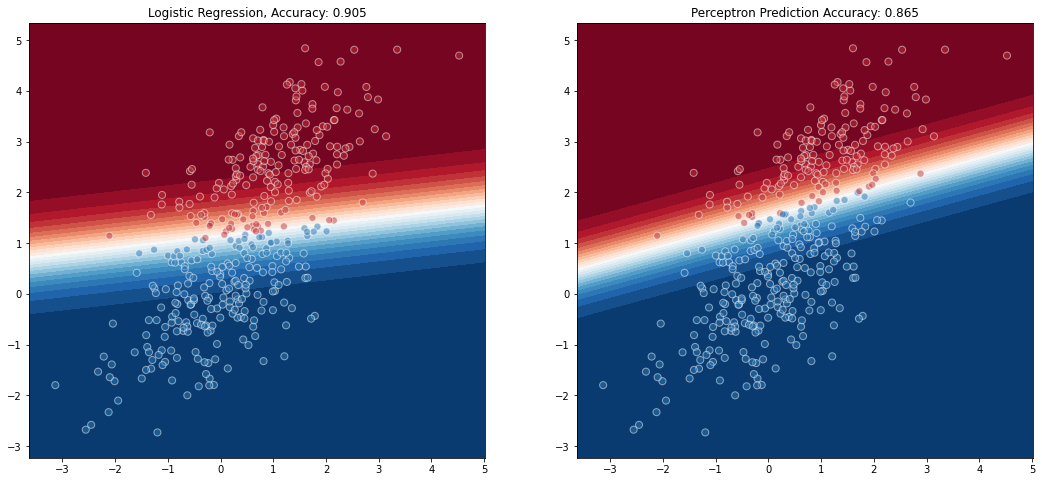

In [ ]:
# @title Prediction on Test Data given by Sci-Kit Learn models

Y_pred, Y_smooth = predict(W_logr_sck, X_test)

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)
plot_model_1(W_logr_sck, X_test, Y_logr_sck)
plt.title("Logistic Regression, Accuracy: %1.3f" %pred_accuracy(Y_test, Y_logr_sck))

Y_pred, Y_smooth = predict(W_perc_sck, X_test)

plt.subplot(1,2,2)
plot_model_1(W_perc_sck, X_test, Y_perc_sck)
plt.title("Perceptron Prediction Accuracy: %1.3f" %pred_accuracy(Y_test, Y_perc_sck))
plt.show()